In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv("AI_in_HealthCare_Dataset.csv", sep = ",")

# Introdução
**Sobre o Conjunto de Dados**

O conjunto de dados "IA na Saúde" é uma coleção cuidadosamente elaborada de 5000 entradas e 20 categorias, destinada à pesquisa acadêmica na interseção entre saúde e inteligência artificial. Abrangendo uma ampla gama de atributos de saúde, como demografia do paciente, sinais vitais, diagnósticos médicos, tratamentos e resultados, o conjunto oferece uma base robusta para investigações sobre o papel da IA na saúde.

In [4]:
dados.head(5)

,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,1,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,2,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,3,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,NaN,Hypertension,2,0.802673
3,4,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,5,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850


As colunas do DataSet são

In [5]:
for column in dados.columns:
  print(column)

Patient_ID
Age
Gender
Blood_Pressure
Heart_Rate
Temperature
Diagnosis
Medication
Treatment_Duration
Insurance_Type
Doctor_Name
Hospital_Name
Lab_Test_Results
X-ray_Results
Surgery_Type
Recovery_Time
Allergies
Family_History
Patient_Satisfaction
AI_Diagnosis_Confidence


Para que haja uma análise completa, o estudo será dividido em partes, sendo elas:

*   Análise Descritiva Básica
*   Testes de Comparação
*   Teste de Associação
*   Testes de Correlação
*   Conclusão

Sendo assim, as bibliotecas a serem utilizada são:

*   Pandas
*   Matplotlib
*   Numpy
*   






# Análise Descritiva Básica
Nesta sessão, será realizado cálculos básico a respeito das variáveis, a fim de entender seu funcionamento dentro do Dataset.

Para as variáveis quantitativas, será feito o cálculo das medidas de tendência central (Moda, Média e Mediana), além do Desvio-padrão e Coeficiente de Variação.

In [6]:
quantitative_cols = dados.select_dtypes(include=['int64', 'float64']).columns
for col in quantitative_cols:
  print("Coluna - "+col)
  media = dados[col].mean()
  media_formatado = "{:.2f}".format(media)
  print("Média: "+media_formatado)

  mediana = dados[col].median()
  mediana_formatada = "{:.2f}".format(mediana)
  print("Mediana: {}".format(mediana_formatada))

  desvio_padrao = dados[col].std()
  desvio_padrao_formatado = "{:.2f}".format(desvio_padrao)
  print("Desvio-Padrão: {}".format(desvio_padrao_formatado))

  coeficiente_variacao = dados[col].std() / dados[col].mean()
  coeficiente_variacao_formatado = "{:.2f}".format(coeficiente_variacao)
  print("Coeficiente de Variação: {}".format(coeficiente_variacao_formatado))

  print()



Coluna - Patient_ID
Média: 2500.50
Mediana: 2500.50
Desvio-Padrão: 1443.52
Coeficiente de Variação: 0.58

Coluna - Age
Média: 53.43
Mediana: 53.00
Desvio-Padrão: 20.93
Coeficiente de Variação: 0.39

Coluna - Blood_Pressure
Média: 119.86
Mediana: 119.77
Desvio-Padrão: 15.06
Coeficiente de Variação: 0.13

Coluna - Heart_Rate
Média: 74.76
Mediana: 75.00
Desvio-Padrão: 9.97
Coeficiente de Variação: 0.13

Coluna - Temperature
Média: 98.60
Mediana: 98.62
Desvio-Padrão: 1.00
Coeficiente de Variação: 0.01

Coluna - Treatment_Duration
Média: 14.97
Mediana: 15.00
Desvio-Padrão: 8.40
Coeficiente de Variação: 0.56

Coluna - Lab_Test_Results
Média: 100.20
Mediana: 100.47
Desvio-Padrão: 19.81
Coeficiente de Variação: 0.20

Coluna - Recovery_Time
Média: 4.94
Mediana: 5.00
Desvio-Padrão: 2.57
Coeficiente de Variação: 0.52

Coluna - Patient_Satisfaction
Média: 2.99
Mediana: 3.00
Desvio-Padrão: 1.42
Coeficiente de Variação: 0.47

Coluna - AI_Diagnosis_Confidence
Média: 0.84
Mediana: 0.84
Desvio-Padrão: 

Para entender o funcionamento básico das variáveis qualitativas, será calculado sua frequência e exibido em gráfico de pizza contendo sua respectiva porcentagem sobre o total.



In [7]:
import matplotlib.pyplot as plt

Coluna - Gender
Gender
Female    2535
Male      2465
Name: count, dtype: int64


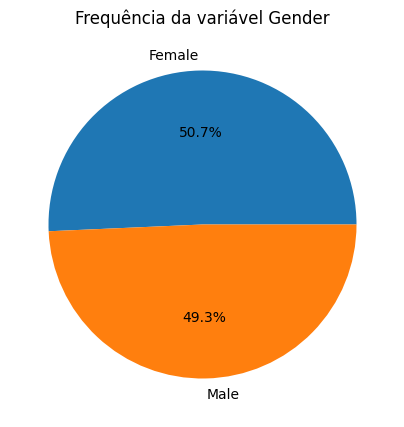


Coluna - Diagnosis
Diagnosis
Heart Disease    1069
Cancer           1003
Diabetes         1003
Influenza         997
Hypertension      928
Name: count, dtype: int64


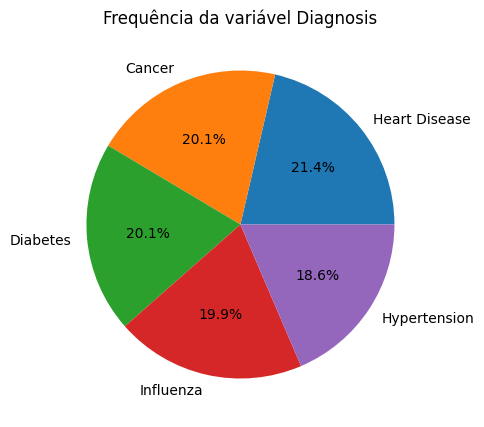


Coluna - Medication
Medication
Aspirin         1021
Antibiotics     1020
Chemotherapy    1017
Statins          980
Insulin          962
Name: count, dtype: int64


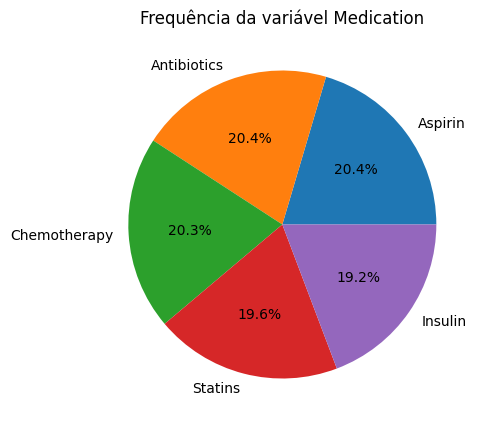


Coluna - Insurance_Type
Insurance_Type
Private      1295
Uninsured    1243
Medicaid     1234
Medicare     1228
Name: count, dtype: int64


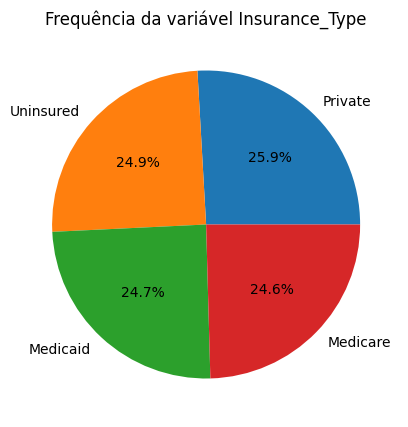


Coluna - Doctor_Name
Doctor_Name
Dr. Johnson    1018
Dr. Lee        1017
Dr. Smith       997
Dr. Wang        988
Dr. Brown       980
Name: count, dtype: int64


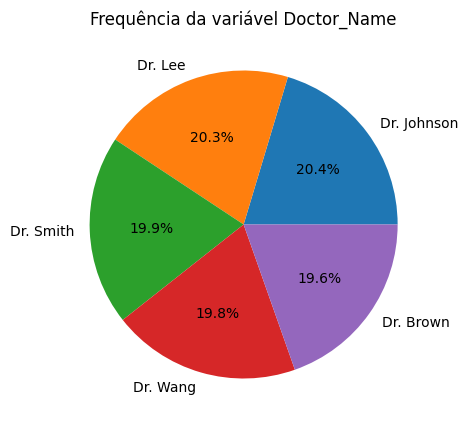


Coluna - Hospital_Name
Hospital_Name
Children's Hospital    1028
City Medical Center    1018
Regional Hospital      1001
Healthcare Clinic       981
General Hospital        972
Name: count, dtype: int64


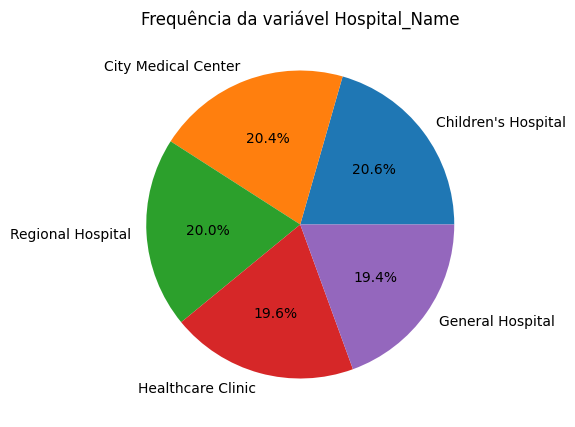


Coluna - X-ray_Results
X-ray_Results
Abnormal    2509
Normal      2491
Name: count, dtype: int64


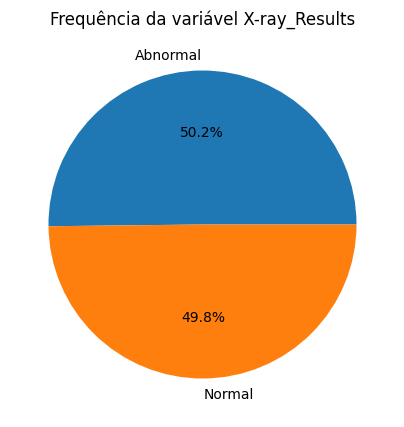


Coluna - Surgery_Type
Surgery_Type
Appendectomy           1028
Knee Replacement       1012
Gallbladder Removal    1001
Angioplasty             992
Cataract Surgery        967
Name: count, dtype: int64


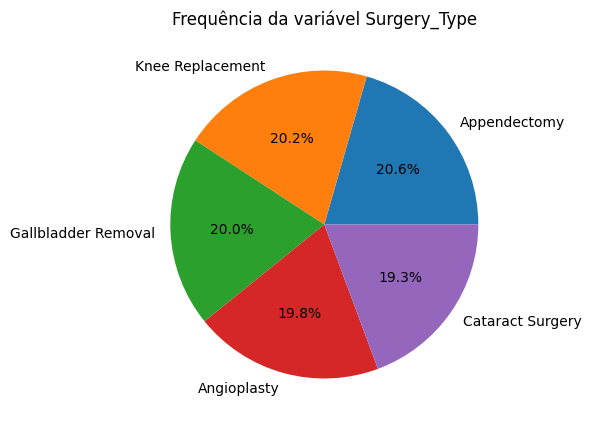


Coluna - Allergies
Allergies
Shellfish     1039
Latex         1034
Penicillin     994
Peanuts        969
Name: count, dtype: int64


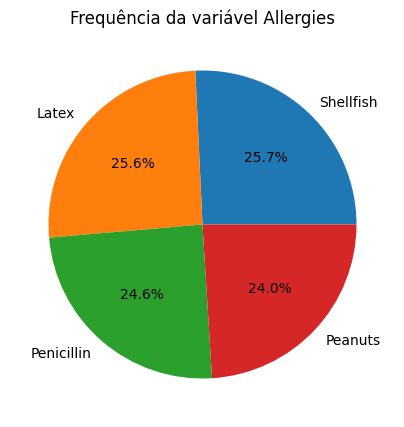


Coluna - Family_History
Family_History
Heart Disease    1025
Hypertension     1014
Diabetes          991
Alzheimer's       988
Cancer            982
Name: count, dtype: int64


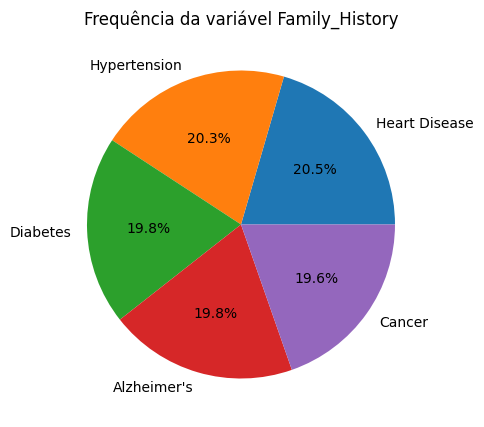

In [8]:
qualitative_cols = dados.select_dtypes(include=['object']).columns
for col in qualitative_cols:
  print("Coluna - "+col)
  freq = dados[col].value_counts()
  print(freq)

  plt.figure(figsize=(5, 5))
  plt.pie(freq, labels=freq.index, autopct='%1.1f%%')
  plt.title('Frequência da variável '+col)
  plt.show()

  print()
